In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings 
warnings.filterwarnings('ignore')


In [3]:
# Load crime data
crime_data = pd.read_csv("crime_data.csv", index_col=0)
crime_data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [4]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
# Standardize the data
scaler = StandardScaler()
crime_data_scaled = scaler.fit_transform(crime_data)

# HIERARCHIAL CLUSTERING

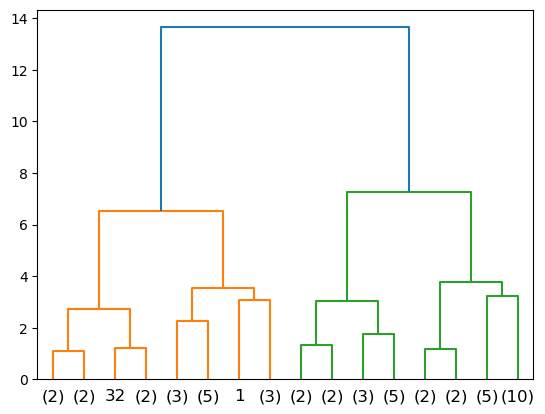

In [6]:
# Calculate linkage matrix
linkage_matrix = linkage(crime_data_scaled, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

# AGGLOMERETIVE CLUSTERING

In [7]:
# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_cluster.fit(crime_data_scaled)

# Add cluster labels to the original dataset
crime_data['Cluster_Labels'] = agg_cluster.labels_

# Count the number of states in each cluster
crime_data['Cluster_Labels'].value_counts()

0    31
1    19
Name: Cluster_Labels, dtype: int64

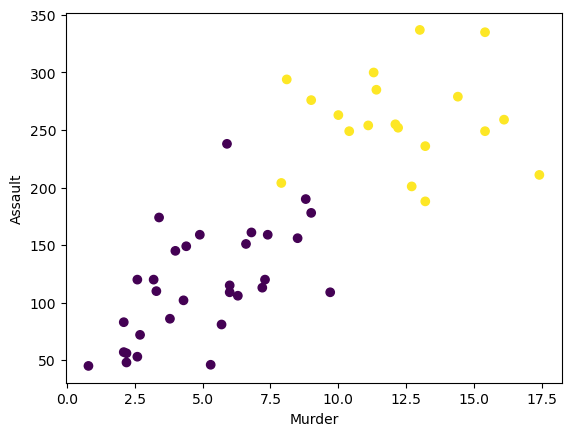

In [8]:
# Visualize the clusters
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=crime_data['Cluster_Labels'], cmap='viridis')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# K-MEANS CLUSTERING

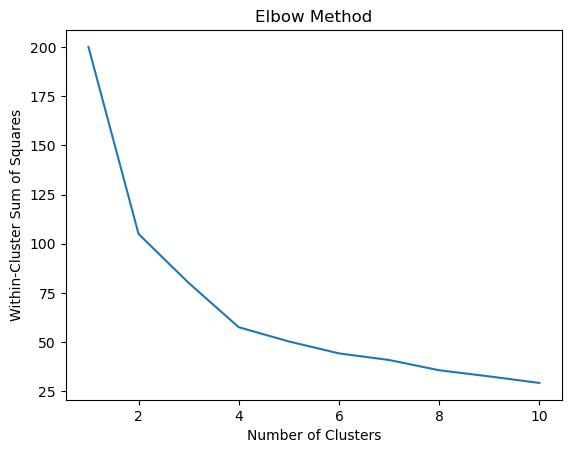

In [13]:
# Calculate within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(crime_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

# DENDROGRAM

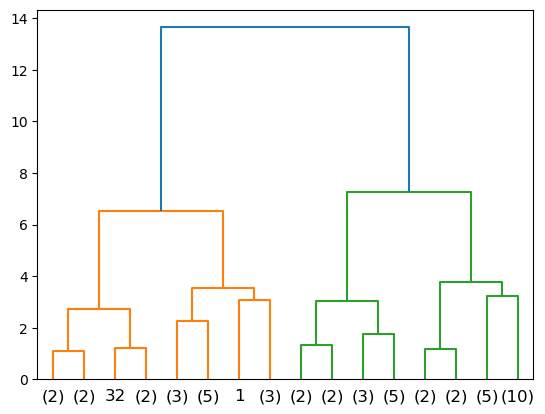

In [12]:
# Calculate linkage matrix
linkage_matrix = linkage(crime_data_scaled, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()